# Multivariate linear regression

Explore the data synthesis and outcome!
Based on the lecture material we should be able to understand the following related to least-squares-fitting:

- R-squared
- (F-statistic)
- coef
- std err
- t
- P>|t|


[[ 0.        ]
 [ 0.1010101 ]
 [ 0.2020202 ]
 [ 0.3030303 ]
 [ 0.4040404 ]
 [ 0.50505051]
 [ 0.60606061]
 [ 0.70707071]
 [ 0.80808081]
 [ 0.90909091]
 [ 1.01010101]
 [ 1.11111111]
 [ 1.21212121]
 [ 1.31313131]
 [ 1.41414141]
 [ 1.51515152]
 [ 1.61616162]
 [ 1.71717172]
 [ 1.81818182]
 [ 1.91919192]
 [ 2.02020202]
 [ 2.12121212]
 [ 2.22222222]
 [ 2.32323232]
 [ 2.42424242]
 [ 2.52525253]
 [ 2.62626263]
 [ 2.72727273]
 [ 2.82828283]
 [ 2.92929293]
 [ 3.03030303]
 [ 3.13131313]
 [ 3.23232323]
 [ 3.33333333]
 [ 3.43434343]
 [ 3.53535354]
 [ 3.63636364]
 [ 3.73737374]
 [ 3.83838384]
 [ 3.93939394]
 [ 4.04040404]
 [ 4.14141414]
 [ 4.24242424]
 [ 4.34343434]
 [ 4.44444444]
 [ 4.54545455]
 [ 4.64646465]
 [ 4.74747475]
 [ 4.84848485]
 [ 4.94949495]
 [ 5.05050505]
 [ 5.15151515]
 [ 5.25252525]
 [ 5.35353535]
 [ 5.45454545]
 [ 5.55555556]
 [ 5.65656566]
 [ 5.75757576]
 [ 5.85858586]
 [ 5.95959596]
 [ 6.06060606]
 [ 6.16161616]
 [ 6.26262626]
 [ 6.36363636]
 [ 6.46464646]
 [ 6.56565657]
 [ 6.66666

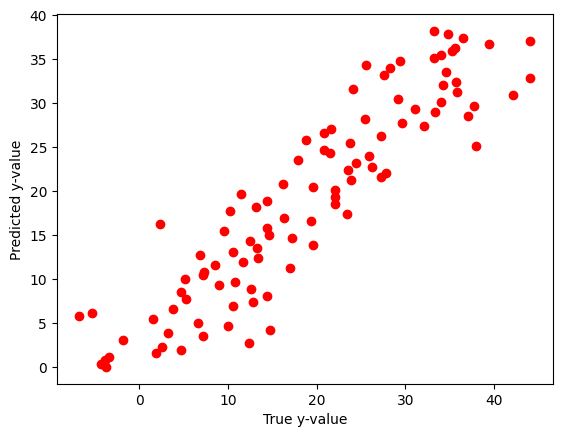

In [50]:
import statsmodels.api as sm
import numpy as np
import itertools as iter
import matplotlib.pyplot as plt

# Generate a set of predictor variables
span = np.linspace(0, 10, 100)
x=list( iter.combinations_with_replacement(span,1))
x=np.array(x)

print(x)

# Generate the corresponding responce variables
y = 3 * x[:,0]  + 0.1 * x[:,0]**2 + np.random.randn(len(x[:,0])) * 5

# Perform least square fit
est = sm.OLS(y,x).fit()
print(est.summary())
y_pred=est.predict(x)


plt.xlabel("True y-value")
plt.ylabel("Predicted y-value")
plt.scatter(y, y_pred, color='red')


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     462.5
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           6.87e-39
Time:                        14:05:51   Log-Likelihood:                -308.81
No. Observations:                 100   AIC:                             621.6
Df Residuals:                      98   BIC:                             626.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1793      1.064     -1.108      0.2

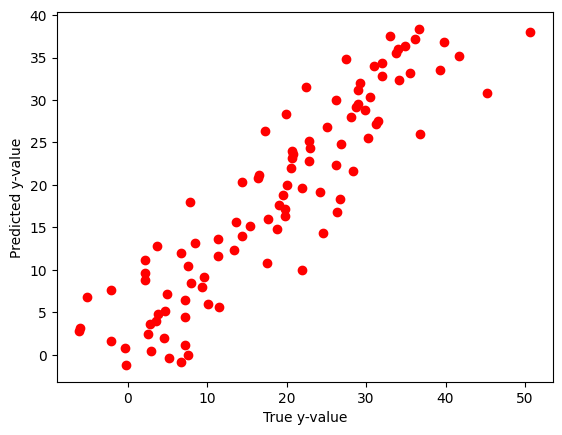

In [51]:
import statsmodels.api as sm
import numpy as np
import itertools as iter

# Generate a set of predictor variables
span = np.linspace(0, 10, 100)
x=list( iter.combinations_with_replacement(span,1))
x=np.array(x)

# Generate the corresponding responce variables
y = 3 * x[:,0]  + 0.1 * x[:,0]**2 + np.random.randn(len(x[:,0])) * 5

# To include intercept we use this function
x  = sm.add_constant(x)

# Perform least square fit
est = sm.OLS(y,x).fit()
print(est.summary())
y_pred=est.predict(x)

plt.xlabel("True y-value")
plt.ylabel("Predicted y-value")
plt.scatter(y, y_pred, color='red')


### Ridge regression

Compare the results to the example above.

Write a simple routine to calcualte the R-squared value using the `ridge_reg_pred`  and `y` arrays.



2817.023463613248
16110.988634061508
0.17485106144619564
0.8251489385538043


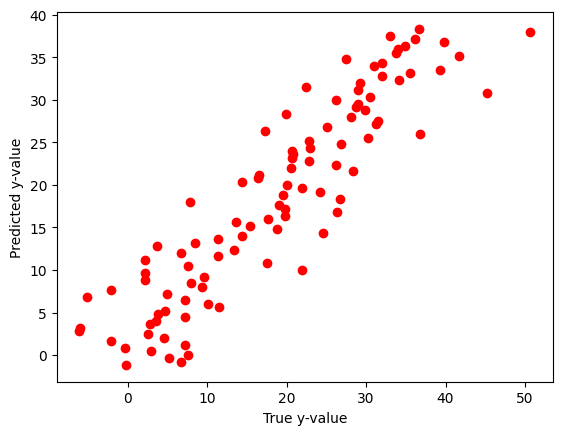

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.preprocessing import PolynomialFeatures
X=x

#scikit-learn installerad istället för sklearn, nytt namn, se här: https://pypi.org/project/sklearn/


# Ridge regression
lamb=1.0
ridge_reg = Ridge(alpha=lamb)  # You can adjust the regularization parameter (alpha) as needed
ridge_reg.fit(X, y)
ridge_reg_pred = ridge_reg.predict(X)

#Inbyggd funktion for R2
R2I = ridge_reg.score(X, y)

#Egen funktion för R2                               Den räknar något men inte rätt då >1. Kolla viader på detta senare. Använd inbyggd så länge.
y_mean = np.mean(y)
y_pred = y_pred
y_exp = y

u = ((y_exp - y_pred)**2).sum()
v = ((y_exp - y_mean)**2).sum()

R2E = (1 - (u/v))

print(u)
print(v)
print(u/v)
print(R2E)





plt.xlabel("True y-value")
plt.ylabel("Predicted y-value")
#plt.scatter(X, y, label='Data')
plt.scatter(y, ridge_reg_pred, color='red', label=f'Ridge Regression (lamdba={lamb})')





## Kernel ridge regression with RBF

### What happens here!?

How can the prediction be so good?

Task #1: Go back and repeat the exercise using a one-dimensional plot and make a scatter-plot with the real xy-data and the model xy-data.

Task #2: Partition the data into 80% fitting and 20% validation and see see how well the various models perform. Explore the gamma parameter and try to explain what you see...


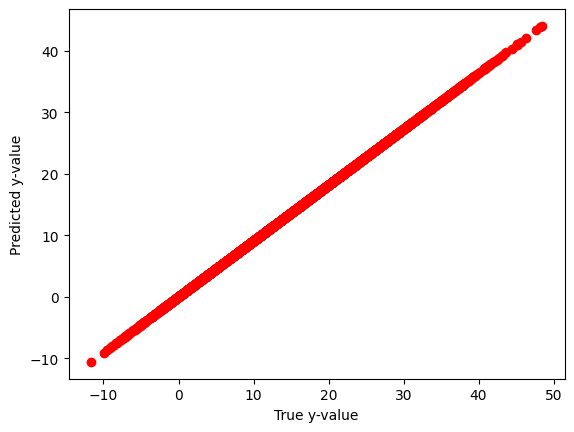

In [48]:
from sklearn.kernel_ridge import KernelRidge

# Kernel ridge regression with RBF
gamma=1000.
kernel_ridge_reg = KernelRidge(alpha=0.1, kernel='rbf', gamma=gamma)
kernel_ridge_reg.fit(X, y)
kernel_ridge_reg_pred = kernel_ridge_reg.predict(X)

#plt.scatter(X, y, label='Data')
plt.xlabel("True y-value")
plt.ylabel("Predicted y-value")
plt.scatter(y, kernel_ridge_reg_pred, color='red', label=f'Ridge Regression (gamma={gamma})')

In [ ]:
#Task 2 



# Final task!

1. Produce a sythetic multivariate data-set (more than 4 independent variables) with all "x-values" in the range [0-2]. The data should have a single column for y-values and multiple column for the x-values. Generate the y-value such that there is a strong linear dependency in at-least one of the independent variables. You can have noise added as in the example given above (dont make the noise completely dominate your data!).

2. Exchange your data set with a peer. But only a part where all x-values are in the range [0,1].

3. Make use of the regression techniques above and try to contruct a effecient model that captures the data in faithful way.

4. Predict (extrapolate) data in the region where some of the x-values are in the range [1,2].

5. Exchange your extrapolated data with your peer.

6. Asses how well you and your peer did in the extrapolation task. Discuss and decide on at-least one measure to assess the extrapolation quality.
